# Holophenotype clustermap

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [1]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Inter', 6)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('inter', 9)

In [102]:
fullMetaData

,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,TrhCsCh,TrhCsCh_ele.csv,main5HT,deltadelta,24,Starved,98.0
1,R50CsCh,R50CsCh_ele.csv,main5HT,deltadelta,0,Fed,130.0
2,TrhACR,TrhACRRound2_ele.csv,main5HT,deltadelta,0,Fed,79.0
3,R50ACR,R50ACRRound2_ele.csv,main5HT,deltadelta,0,Fed,58.0
4,TrhVNCCsCh,TrhVNCCsCh_ele.csv,intersection,delta,24,Starved,88.0
5,TrhVNCACR1,TrhVNCACR1_ele.csv,intersection,delta,0,Fed,38.0
6,SXVNC1CsCh,SXVNC1CsCh_ele.csv,novelSplits,delta,24,Starved,52.0
7,SXVNC2CsCh,SXVNC2CsCh_ele.csv,novelSplits,deltadelta,24,Starved,82.0
8,SXVNC3CsCh,SXVNC3CsCh_ele.csv,novelSplits,delta,24,Starved,14.0
9,RLTG,RLTG_ele.csv,intersection,delta,24,Starved,40.0


In [126]:

%matplotlib inline

paperpath = '/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure5exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 hr starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 hr reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 hr starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 hr reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index).append(pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data


/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_28848/1837473869.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fullMetaData = fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index).append(pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)).reset_index(drop = True)


# Take a look at the meta data for the whole dataset

In [127]:
fullMetaData

,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,TrhCsCh,TrhCsCh_ele.csv,main5HT,deltadelta,24,Starved,98.0
1,R50CsCh,R50CsCh_ele.csv,main5HT,deltadelta,0,Fed,130.0
2,TrhACR,TrhACRRound2_ele.csv,main5HT,deltadelta,0,Fed,79.0
3,R50ACR,R50ACRRound2_ele.csv,main5HT,deltadelta,0,Fed,58.0
4,TrhVNCCsCh,TrhVNCCsCh_ele.csv,intersection,delta,24,Starved,88.0
5,TrhVNCACR1,TrhVNCACR1_ele.csv,intersection,delta,0,Fed,38.0
6,SXVNC1CsCh,SXVNC1CsCh_ele.csv,novelSplits,delta,24,Starved,52.0
7,SXVNC2CsCh,SXVNC2CsCh_ele.csv,novelSplits,deltadelta,24,Starved,82.0
8,SXVNC3CsCh,SXVNC3CsCh_ele.csv,novelSplits,delta,24,Starved,14.0
9,RLTG,RLTG_ele.csv,intersection,delta,24,Starved,40.0


# Check that the components cannot be easily reduced

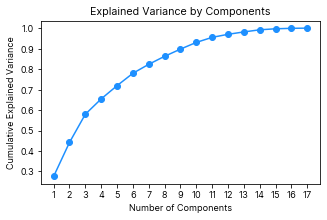

In [6]:
def locoPCAplotExpVar(data):
    from sklearn.decomposition import PCA
    plotTools.setFont('Inter', 9)
    pca = PCA()
    pca.fit(data)
    f, axes = plt.subplots(1,1, figsize = (5, 3))
    plt.xticks(np.arange(len(data.columns)+1))
    plt.plot(range(1, len(data.columns)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-', color = 'dodgerblue')
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plot_table = pd.DataFrame(data = [range(1, len(data.columns)+1), pca.explained_variance_ratio_.cumsum()])
    
    return f, pca, plot_table
def scaleWithColumns(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data)
    dataScaled = pd.DataFrame(scaler.transform(data), columns = data.columns)
    return dataScaled
def makeBigDf(data, dependentSelection = vectorselection, independentIndices = range(0, 5)):
    independentColumns = data.iloc[:, independentIndices]
    independentColumns.columns =  pd.MultiIndex.from_product([['Independent'], independentColumns.columns ])
    dependentColumns = data[dependentSelection]
    dependentColumns.columns =  pd.MultiIndex.from_product([ ['Raw'], dependentColumns.columns])
    dataScaled =  scaleWithColumns(data[dependentSelection])
    dataScaled.columns =  pd.MultiIndex.from_product([['Scaled'], dataScaled.columns ])
    bigData = pd.concat([independentColumns, dependentColumns,  dataScaled], axis =1 )
    return bigData


plotTools.setFont('Inter', 9)
w1118Big = makeBigDf(dataDict['w1118'].dropna(), vectorselection)
w1118Big = w1118Big.dropna()
f, pca, plot_table = locoPCAplotExpVar(w1118Big['Scaled']);
f.savefig(figurepath + 'componentsexplained.svg')
f.savefig(figurepath + 'componentsexplained.png', dpi = 300)
plot_table.transpose().rename(columns = {'0':'factor', '1': 'Cumulative Explained Variance'}).to_csv(figurepath + 'componentsexplained.csv')

In [7]:
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])


contrastsW1118 = []
for i in range(0, len(starvationhrs)):
    if i ==0:
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(w1118base, x = 'Starvation', y = vectorselection[j], idx = ('0', '00'))
        contrastsW1118.append(contrast_vector)
    else:
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(dataDict['w1118'], x = 'Starvation', y = vectorselection[j], idx = ('0', starvationhrs[i]))
        contrastsW1118.append(contrast_vector)
        contrast_vector = [None]*len(vectorselection)
        for j in range(len(vectorselection)):
            contrast_vector[j] = dabest.load(dataDict['w1118'], x = 'Starvation', y = vectorselection[j], idx = ( starvationhrs[i], '0'))
        contrastsW1118.append(contrast_vector)
indexw1118 = ['baseline', '24 hr starved', '24 hr reversed', '48 hr starved', '48 hr reversed']


/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_28848/4168228821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


In [115]:
len(dataDict['w1118'])

360

In [37]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)                
        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection


In [149]:
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData, 'Group', ['wildtype', 'main5HT', 'metaReview', 'intersection'], vectorselection)
# 

In [150]:
dataDict['48 hr starved']

,Unnamed: 0,Light,Genotype,Status,ID,Starvation,Meal Size,Feed Speed,Prefeed Speed,Duringfeed Speed,...,Duration,Latency,Duringfeed Speed Ratio,Perifeed Speed Ratio,Speed,Height,Food Port Occupancy,Ctrl Port Occupancy,Falls,date
0,0,25,w1118,Ctrl,1,0,0.017590,0.002850,2.355302,0.419120,...,0.199125,117.030500,0.177948,1.390686,0.167022,1.834326,0.320228,0.022923,6.0,2023-03-29_15-44-50
1,1,25,w1118,Ctrl,25,0,0.018728,0.004305,1.307458,0.261340,...,0.623833,5.073983,0.199884,0.725188,0.820721,9.524346,0.636982,1.082940,2.0,2023-03-29_15-44-50
2,2,25,w1118,Ctrl,11,0,0.005274,0.001689,0.538224,0.390943,...,0.312200,47.245100,0.726357,1.364951,0.157038,11.216739,0.548069,0.086830,2.0,2023-03-29_15-44-50
3,3,25,w1118,Ctrl,12,0,0.004643,0.001186,2.239479,0.417189,...,0.668333,26.981900,0.186288,0.830459,1.155604,10.253588,1.826202,1.571270,3.0,2023-03-29_15-44-50
4,4,25,w1118,Ctrl,13,0,0.003929,0.001078,0.757499,0.578090,...,0.179250,28.111417,0.763155,1.016341,0.623398,10.010737,0.628647,0.170186,11.0,2023-03-29_15-44-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,297,25,w1118,Test,24,48,0.000000,0.000000,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.057227,13.728189,0.047930,0.000000,6.0,2023-04-03_14-39-24
188,298,25,w1118,Test,27,48,0.000000,0.000000,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.046664,6.212815,0.000000,0.000000,15.0,2023-04-03_14-39-24
189,299,25,w1118,Test,29,48,0.000000,0.000000,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.061131,4.885380,0.000000,0.000000,9.0,2023-04-03_14-39-24
190,300,25,w1118,Test,30,48,0.000000,0.000000,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,22.0,2023-04-03_14-39-24


In [151]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)



TrhCsCh


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50CsCh
TrhACR


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50ACR
TrhVNCCsCh
TrhVNCACR1
RLTG


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


TLRG
TrhGal4TshGal80CsCh
NPFCsCh


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


NPFACR1


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH3CsCh


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH2ACR
Dilp2CsCh
Dilp2ACR1


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


baseline
24 hr starved


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


24 hr reversed


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


48 hr starved
48 hr reversed


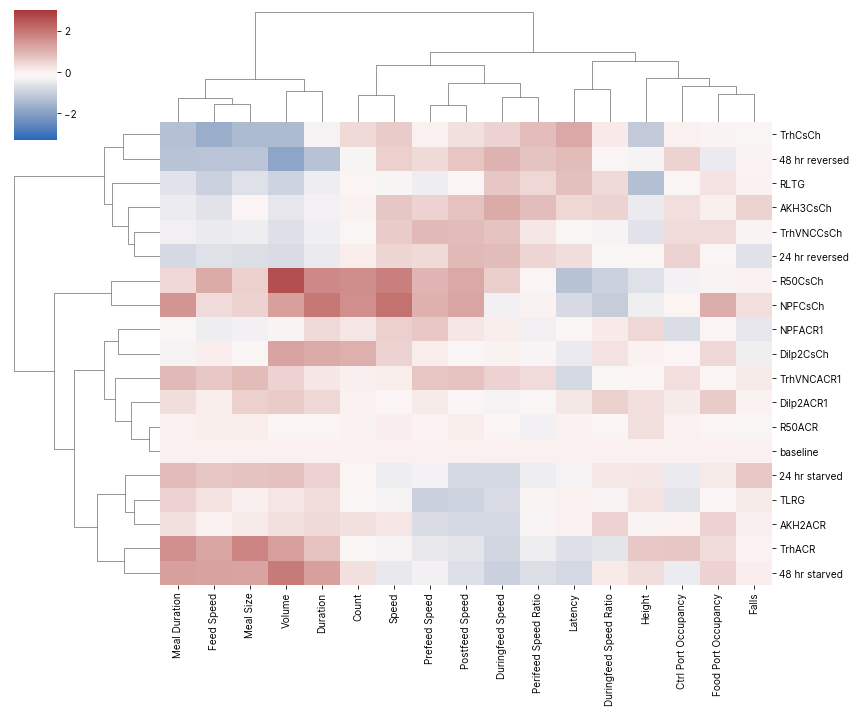

In [159]:
gdf1 = gDf.drop([ 'TrhGal4TshGal80CsCh'])

sns.clustermap(gdf1, cmap='vlag', method = 'complete', figsize=(12, 10), vmin=3, vmax=-3)


In [13]:
contrastsSt, indexSt, deltaTypeSt = collectContrasts(fullMetaData, 'State', ['Starved'], vectorselection)
spTrans, aTrans, mean_deltaTrans = spiral_heatmap(contrastsSt, 21, indexSt, 
                         vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = deltaTypeSt)
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
aTrans.set_yticklabels(indexSt, rotation = 0, ha = 'right')


KeyError: '24 hr reversed'

In [ ]:
contrastsSt, indexSt, deltaTypeSt = collectContrasts(fullMetaData, 'Starved State', '24', vectorselection)
spTrans, aTrans, mean_deltaTrans = spiral_heatmap(contrastsSt, 21, indexSt, 
                         vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = deltaTypeSt)
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
aTrans.set_yticklabels(indexSt, rotation = 0, ha = 'right')


KeyError: 'Starved State'

In [14]:
# spw1118, aw1118, mean_deltaw1118 = spiral_heatmap(contrasts, 21, indexw1118, 
#                            vectorselection, reverse_neg=False,  
#                            abs_rank = True, chop_tail = 2.5, delta_type = ['delta','delta','delta','delta','delta',])
# spw1118.savefig(figurepath+ 'spw1118_21.png', dpi = 300)
# spw1118.savefig(figurepath+ 'spw1118_21.svg')
contrastsTrans, indexTrans, deltaTypeTrans = collectContrasts(fullMetaData, 'Group', 'main5HT', vectorselection)
spTrans, aTrans, mean_deltaTrans = spiral_heatmap(contrastsTrans, 21, indexTrans, 
                         vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = deltaTypeTrans)
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
aTrans.set_yticklabels(indexTrans, rotation = 0, ha = 'right')
spTrans.savefig('spTrans_21.png', dpi = 300)
spTrans.savefig('spTrans_21.svg')



# # spTrh, aTrh, mean_deltaTrh = spiral_heatmap(contrastsTrh, 21, indexTrh, 
# #                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = ['deltadelta', 'deltadelta'])
# # plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# # aTrh.set_yticklabels(indexTrh, rotation = 0, ha = 'right')
# # spTrh.savefig('spTrh_21.png', dpi = 300)
# # spTrh.savefig('spTrh_21.svg')

# spSplits, aSplits, mean_deltaSplits = spiral_heatmap(contrastsSplits, 21, indexSplits, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 0, delta_type = ['delta','delta', 'delta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# aSplits.set_yticklabels(indexSplits, rotation = 0, ha = 'right')
# # aSplits.set_yticklabels(['(R50 - Trh)CsCh', '(Trh - R50)CsCh','BrainTrhCsCh',  'VNCTrhCsCh', 'SXVNC1CsCh'], rotation = 0, ha = 'right')
# spSplits.savefig(figurepath+ 'spSplits_21.png', dpi = 800)
# spSplits.savefig(figurepath+ 'spSplits_21.svg')


# spIntersect, aIntersect, mean_deltaIntersect = spiral_heatmap(contrastsIntersect, 21, indexIntersect, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 0, delta_type = ['delta','delta','delta','delta','delta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# aIntersect.set_yticklabels(indexIntersect, rotation = 0, ha = 'right')
# spIntersect.savefig(figurepath+ 'spIntersect_21.png', dpi = 800)
# spIntersect.savefig(figurepath+ 'spIntersect_21.svg')


# spMeta, aMeta, mean_deltaMeta = spiral_heatmap(contrastsMeta, 21, indexMeta, 
#                          vectorselection, reverse_neg = False, abs_rank = True, chop_tail = 2.5, delta_type = ['deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta'])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spMeta.savefig(figurepath+'spMeta_21.png', dpi = 300)
# spMeta.savefig(figurepath+'spMeta_21.svg')


TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [ ]:
dataDict['TrhACR']

,Light,Genotype,Status,ID,Starvation,Meal Size,Feed Speed,Prefeed Speed,Duringfeed Speed,Postfeed Speed,...,Duration,Latency,Duringfeed Speed Ratio,Perifeed Speed Ratio,Speed,Height,Food Port Occupancy,Ctrl Port Occupancy,Falls,date
0,Green Light On,w1118; trh-gal4,Ctrl,11,0,0.004742,0.001012,1.840305,0.739630,2.867720,...,0.046533,2.267517,0.401906,1.558285,0.358621,8.503425,0.052781,0.015279,21.0,2022-03-25_15-01-52
1,Green Light On,trh-gal4>uas-acr1,Test,12,0,0.033760,0.001482,2.907689,1.345036,2.489011,...,0.726533,2.078617,0.462579,0.856010,0.567103,12.456412,0.709072,8.329687,39.0,2022-03-25_15-01-52
2,Green Light On,w1118; uas-acr1,Ctrl,13,0,0.003792,0.000948,3.765813,0.683184,3.458783,...,0.762517,0.940200,0.181417,0.918469,1.609981,7.312137,3.184921,1.270218,20.0,2022-03-25_15-01-52
3,Green Light On,w1118; trh-gal4,Ctrl,14,0,0.007594,0.002079,3.071374,0.772517,2.961716,...,0.820408,2.379417,0.251522,0.964297,1.396117,8.596959,2.023043,0.703516,9.0,2022-03-25_15-01-52
4,Green Light On,trh-gal4>uas-acr1,Test,15,0,0.217236,0.004509,3.237067,1.663350,1.664668,...,0.528225,0.065483,0.513845,0.514252,0.441741,9.412301,0.938948,1.402171,48.0,2022-03-25_15-01-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Green Light Off,w1118; trh-gal4,Ctrl,22,0,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.058319,10.554183,0.009028,0.008334,41.0,2022-04-20_13-15-01
236,Green Light Off,w1118; uas-acr1,Ctrl,24,0,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.062733,9.862422,0.000000,0.000000,5.0,2022-04-20_13-15-01
237,Green Light Off,w1118; uas-acr1,Ctrl,27,0,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.067246,4.292495,0.000000,0.000000,21.0,2022-04-20_13-15-01
238,Green Light Off,trh-gal4>uas-acr1,Test,29,0,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,120.000000,NaN,NaN,0.056551,13.885105,0.000000,0.000000,0.0,2022-04-20_13-15-01


In [ ]:
deltas=mean_deltaw1118.append(mean_deltaTrans).append(mean_deltaIntersect).append(mean_deltaMeta).append(mean_deltaSplits)
indices = np.concatenate([indexw1118, indexTrans,indexIntersect, indexMeta, indexSplits])
allContrasts = np.concatenate([contrasts,contrastsTrans, contrastsIntersect, contrastsMeta, contrastsSplits], axis = 0)
delta_types = np.array(['delta', 'delta', 'delta', 'delta', 'delta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta', 'deltadelta','deltadelta', 'delta', 'delta','delta','delta', 'delta', 'delta', 'delta', 'delta', 'delta', 'delta', ])



corr = deltas.T.corr()


[print(i, indices[i]) for i in range(len(indices))];
allind = np.arange(0, 23, 1)
trhmeta_f = np.array([0, 2, 4, 6, 8, 17, 18, 19])
trhmeta_st = np.array([0, 1, 3, 5, 7, 14, 15, 16])
trh_inter = np.array([ 3, 4, 5, 6, 9,  10, 11, 12, 13])
trhmeta_inter_f = np.array([2, 4, 6, 8,9, 10,11,12, 17, 18, 19])
trhmeta_inter_st = np.array([ 1, 3, 5, 7,13, 14, 15, 16])



In [ ]:


# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu = sns.clustermap(deltas.iloc[ allind], cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3, xticklabels=True, yticklabels=True)
fclu.figure.set_size_inches(5, 5)
fclu.figure.savefig(figurepath+'clustermap.svg')
fclu.figure.savefig(figurepath+'clustermap.png')
# newind = allind[fclu.dendrogram_row.reordered_ind]
# sp_allind, a_allind, mean_delta_allind = spiral_heatmap(allContrasts[newind], 
#                                             21, indices[newind], 
#                          vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
#                                             reverse_neg = False, abs_rank = True,  cmap = divmap, chop_tail = 2.5, vmax = 3, vmin = -2.9, 
#                                             delta_type = delta_types[newind])
# plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# # spBig.set_facecolor([244/255, 245/255, 239/255])
# sp_allind.savefig(figurepath+'spiralclustermap_allind.svg')
# sp_allind.savefig(figurepath+'spiralclustermap_allind.png', dpi= 300)

In [ ]:


# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_st = sns.clustermap(deltas.iloc[ trhmeta_st], cmap='vlag', method = 'average', figsize=(6, 5), vmin=-2.8, vmax=3)
fclu_st.figure.set_size_inches(5, 5)
fclu_st.figure.savefig(figurepath+'clustermap_st.svg')
fclu_st.figure.savefig(figurepath+'clustermap_st.png')
newind = trhmeta_st[fclu_st.dendrogram_row.reordered_ind]
sp_st, a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_st.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_st.savefig(figurepath+'spiralclustermap_st.svg')
sp_st.savefig(figurepath+'spiralclustermap_st.png', dpi= 300)

In [ ]:


Z

NameError: name 'Z' is not defined

In [ ]:
fclu_f = sns.clustermap(deltas.iloc[trhmeta_f], cmap='vlag', method = 'complete ', figsize=(6, 5), vmin=3, vmax=-3)
fclu_f.figure.set_size_inches(5, 5)
fclu_f.figure.savefig(figurepath+'clustermap_f.svg')
fclu_f.figure.savefig(figurepath+'clustermap_f.png')
newind = trhmeta_f[fclu_f.dendrogram_row.reordered_ind]
from scipy.cluster import hierarchy
Zy = hierarchy.linkage(deltas.iloc[ trhmeta_f], 'average')
Zx = hierarchy.linkage(deltas.iloc[ trhmeta_f].T, 'average')
f = plt.figure(figsize=(10, 3));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_f.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,  cmap = divmap, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind], ax =ax);

hierarchy.set_link_color_palette(['k', 'k', 'k'])
with plt.rc_context({'lines.linewidth': 0.5}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx, 
                               above_threshold_color='k');
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, orientation = 'right', 
                               above_threshold_color='k');
ax_denx.set_ylim(0, 4)
ax_denx.set_xlim(0, 245)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(-1, 2+10*len(newind))
ax_deny.set_xlim(20,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

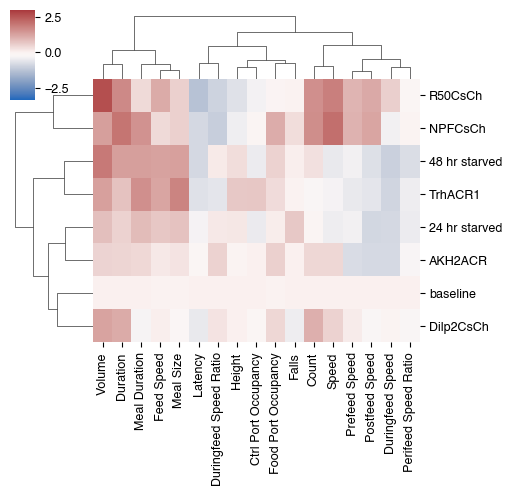

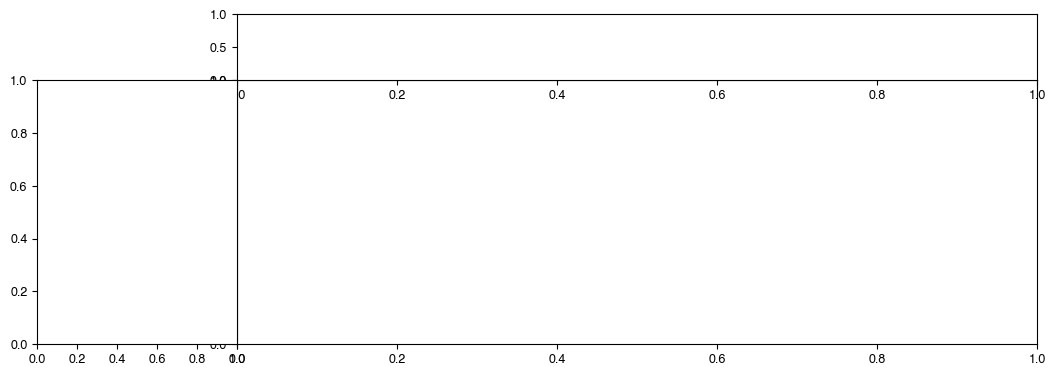

NameError: name 'divmap' is not defined

In [ ]:
fclu_st = sns.clustermap(deltas.iloc[trhmeta_st], cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3)
fclu_st.figure.set_size_inches(5, 5)
fclu_st.figure.savefig(figurepath+'clustermap_st.svg')
fclu_st.figure.savefig(figurepath+'clustermap_st.png')
newind = trhmeta_st[fclu_st.dendrogram_row.reordered_ind]
##### from scipy.cluster import hierarchy
Zy = hierarchy.linkage(deltas.iloc[ trhmeta_st], 'average')
Zx = hierarchy.linkage(deltas.iloc[ trhmeta_st].T, 'average')
f = plt.figure(figsize=(10, 3.3));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

a_st, mean_delta_st = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_st.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,  cmap = divmap, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind], ax =ax, vmin = -3);

hierarchy.set_link_color_palette(['k', 'k', 'k'])
with plt.rc_context({'lines.linewidth': 0.5}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx, 
                               above_threshold_color='k');
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, orientation = 'right', 
                               above_threshold_color='k');
ax_denx.set_ylim(1, 4)
ax_denx.set_xlim(0, 243)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(-1, 2+10*len(newind))
ax_deny.set_xlim(20,1)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

### ax_deny.get_ylim()


##### f

len(Zy)

In [ ]:
ax.get_xlim()

(0.0, 357.0)

# indices[newind]

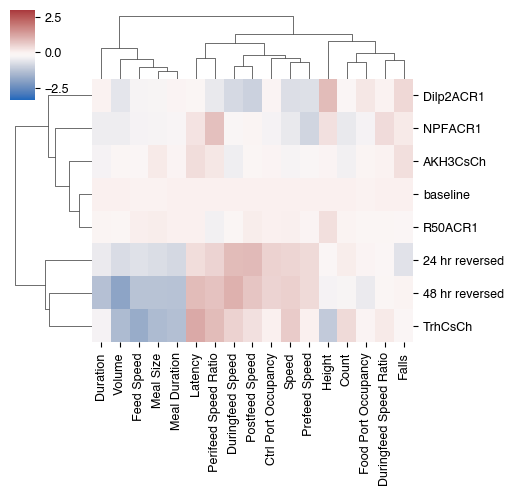

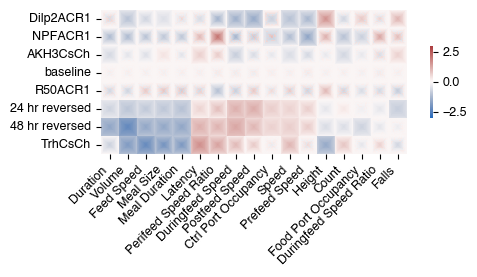

In [ ]:

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_f = sns.clustermap(deltas.iloc[trhmeta_f], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_f.figure.set_size_inches(5, 5)
fclu_f.figure.savefig(figurepath+'clustermap_f.svg')
fclu_f.figure.savefig(figurepath+'clustermap_f.png')
newind = trhmeta_f[fclu_f.dendrogram_row.reordered_ind]

sp_f, a_f, mean_delta_f = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_f.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_f.savefig(figurepath+'spiralclustermap_f.svg')
sp_f.savefig(figurepath+'spiralclustermap_f.png', dpi= 300)


AttributeError: 'str' object has no attribute 'bootstraps_delta_delta'

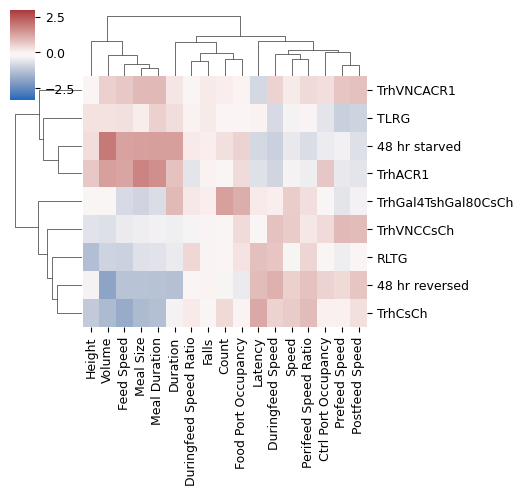

In [ ]:

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_inter = sns.clustermap(deltas.iloc[trh_inter], cmap='vlag', method = 'average', figsize=(6, 5), vmin=3, vmax=-3)
fclu_inter.figure.set_size_inches(5, 5)
fclu_inter.figure.savefig(figurepath+'clustermap_inter.svg')
fclu_inter.figure.savefig(figurepath+'clustermap_inter.png')
newind = trh_inter[fclu_inter.dendrogram_row.reordered_ind]

sp_inter, a_inter, mean_delta_inter = spiral_heatmap(allContrasts[newind], 
                                            21, indices[newind], 
                         vectorselection, sort_by = fclu_inter.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types[newind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
sp_inter.savefig(figurepath+'spiralclustermap_inter.svg')
sp_inter.savefig(figurepath+'spiralclustermap_inter.png', dpi= 300)


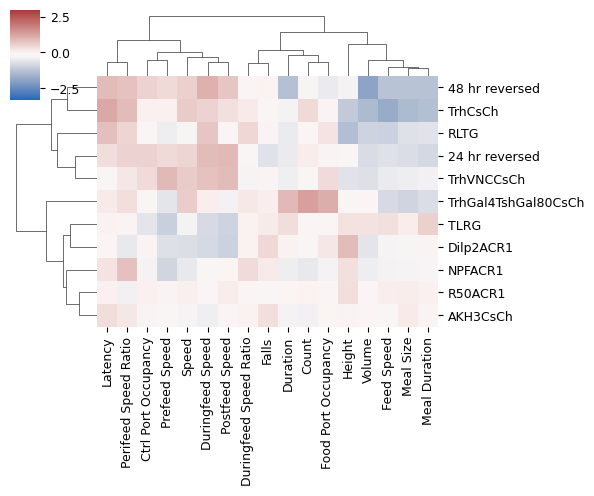

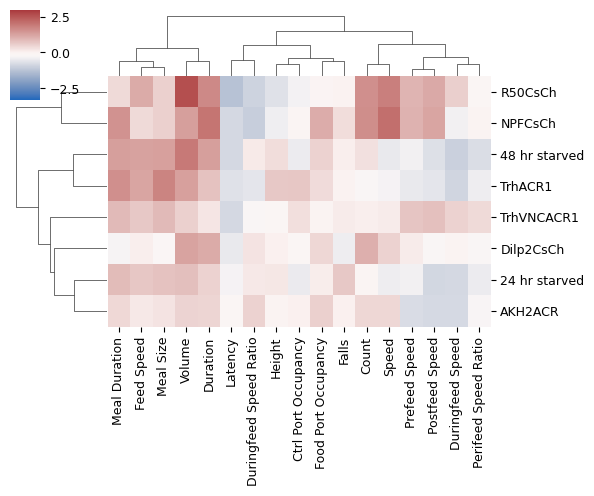

In [ ]:
fclu_inter = sns.clustermap(deltas.iloc[trhmeta_inter_f], cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3)
fclu_inter = sns.clustermap(deltas.iloc[trhmeta_inter_st], cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3)


In [ ]:
yticklabels_dict={'48 hr reversed':'48 hr reversed',
                 'TrhCsCh':'Trh>CsCh',
                  'RLTG':'(Trh-R50H05)>CsCh',
                  '24 hr reversed':'24 hr reversed',
                  'TrhVNCCsCh': 'Trh>VNC CsCh',
                  'AKH3CsCh': 'AKH>CsCh',
                  'baseline': 'baseline',
                  'R50ACR1': 'R50H05>ACR1',
                  'NPFACR1': 'NPF>ACR1',
                  'AKH2ACR': 'AKH>ACR1',
                  'TrhGal4TshGal80CsCh': 'Trh>Brain CsCh',
                  'Dilp2CsCh': 'Dilp2>CsCh',
                  'TrhVNCACR1': 'Trh>VNC ACR1',
                  '24 hr starved': '24 hr starved',
                  'TLRG': '(R50H05 - Trh)>CsCh',
                  '48 hr starved': '48 hr starved',
                  'TrhACR1': 'Trh>ACR1',
                  'R50CsCh': 'R50H05>CsCh',
                  'NPFCsCh': 'NPF>CsCh',
                 }

yticklabels = [yticklabels_dict[item.get_text()] for item in spBig.axes[0].get_yticklabels()]
spBig.axes[0].set_yticklabels(yticklabels)
spBig

In [ ]:
deltas_small=mean_deltaTrh.append(mean_deltaSplits)
indices_small = np.concatenate([indexTrh, indexMeta, ])
allContrasts_small = np.concatenate([contrastsTrh, contrastsSplits], axis = 0)
delta_types_small = [  'deltadelta', 'deltadelta', 'delta','delta', 'delta']

corr_small = deltas.T.corr()

# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(4, 3))
fclu_small = sns.clustermap(deltas_small, cmap='vlag', method = 'complete', figsize=(6, 5), vmin=3, vmax=-3)
fclu_small.figure.set_size_inches(6, 4)
fclu_small.figure.savefig(figurepath+'clustermap_small.svg')
fclu_small.figure.savefig(figurepath+'clustermap_small.png')


spBig_small, aBig_small, mean_deltaBig_small = spiral_heatmap(allContrasts_small[fclu_small.dendrogram_row.reordered_ind], 
                                            21, indices_small[fclu_small.dendrogram_row.reordered_ind], 
                         vectorselection, sort_by = fclu_small.dendrogram_col.reordered_ind, 
                                            reverse_neg = False, abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = [delta_types_small[i] for i in fclu_small.dendrogram_row.reordered_ind])
plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
# spBig.set_facecolor([244/255, 245/255, 239/255])
spBig_small.savefig(figurepath+'spiralclustermap_small.svg')
spBig_small.savefig(figurepath+'spiralclustermap_small.png', dpi= 300)

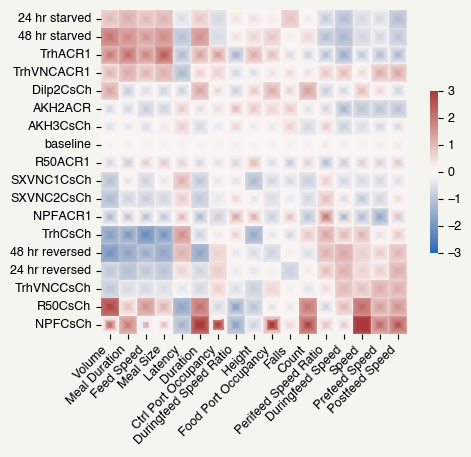

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
# pairs = [['NPFACR1', 'SXVNC2CsCh'], ['TrhVNCACR1', 'Dilp2CsCh'], ['TrhACR1', '48 hr starved'],
# ['TrhCsCh', '48 hr reversed'],['TrhVNCCsCh', '24 hr reversed'], ['R50CsCh', 'NPFCsCh']]
pairs = [ ['TrhACR1', '48 hr starved'],
['TrhCsCh', '48 hr reversed']]





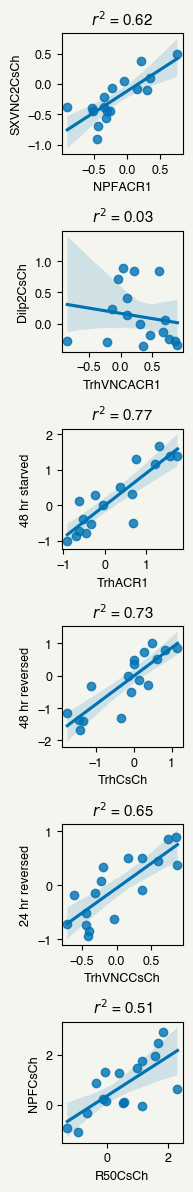

In [ ]:
f, ax = plt.subplots(6, 1, facecolor=[244/255, 245/255, 239/255])

f.set_size_inches(2, 12)
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
for i in range(len(pairs)):
    sns.regplot( x = deltas.loc[pairs[i][0]], y =  deltas.loc[pairs[i][1]], ax = ax.flatten()[i])
    ax.flatten()[i].set_title(r'$r^2$ = ' + str(np.round(r2(deltas.loc[pairs[i][0]], deltas.loc[pairs[i][1]]), 2)))
    # ax.flatten()[i].set_facecolor([244/255, 245/255, 239/255])
f.tight_layout()
f.savefig(figurepath + 'effCorr.svg')
f.savefig(figurepath + 'effCorr.png', dpi = 300)

In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'clusterspiral.svg').scale(0.03),
    Text("A", 0.2, 0.02, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'effCorr.svg').scale(0.016),
    Text("B", 0.2, 0.02, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 15.5),
    ).save(figurepath+"/Figure5.svg")



##### 